# Session 9 exercises

These are sample answers for the in-class exercises in Session 9 of PHAS0030.  You should make sure that you can do these yourself! The further work exercises will be in a separate notebook.

In [1]:
# We always start with appropriate imports; note the use of the IPython magic
# command to set up Matplotlib within the notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as colors

## Section 3: Representing functions

### Question 1

In [2]:
from scipy.interpolate import interp1d
x_samp = np.arange(0,10)
y_samp = np.exp(-x_samp)*x_samp*x_samp

### Question 2

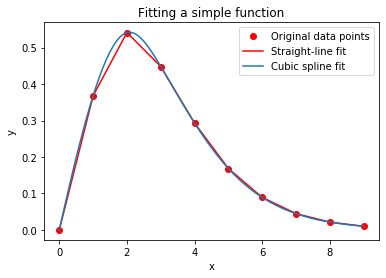

In [3]:
f_int = interp1d(x_samp,y_samp,kind='cubic')
x_plot = np.arange(0,9.1,0.1)
plt.plot(x_samp,y_samp,'ro',label='Original data points')
plt.plot(x_samp,y_samp,'r-',label='Straight-line fit')
plt.plot(x_plot,f_int(x_plot),label='Cubic spline fit')
plt.title("Fitting a simple function")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

(-0.02, 0.55)

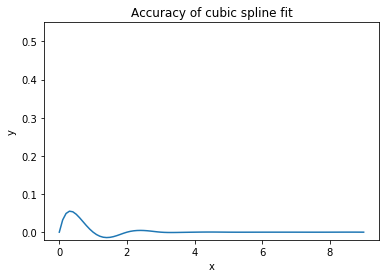

In [4]:
plt.plot(x_plot,f_int(x_plot) - np.exp(-x_plot)*x_plot*x_plot)
plt.title("Accuracy of cubic spline fit")
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-0.02,0.55)

### Question 3

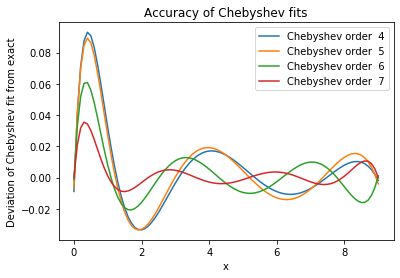

In [5]:
for order in range(4,8):
    coeff_cheb = np.polynomial.chebyshev.chebfit(x_samp,y_samp,order)
    plt.plot(x_plot,np.polynomial.chebyshev.chebval(x_plot,coeff_cheb) - 
             np.exp(-x_plot)*x_plot*x_plot,label='Chebyshev order {0:2d}'.format(order))
plt.title("Accuracy of Chebyshev fits")
plt.xlabel('x')
plt.ylabel('Deviation of Chebyshev fit from exact')
plt.legend()


## 4. Fourier transforms: basics

### Question 1

In [6]:
def discrete_ft(y):
    """Implementation of 1D discrete Fourier transform"""
    leny = len(y)
    coeffs = np.zeros(leny,dtype=complex)
    for k in range(leny):
        for i in range(leny):
            coeffs[k] += y[i]*np.exp(-2j*np.pi*k*i/leny)
    return coeffs

### Question 2

In [7]:
xmax = 2.0
nx = 100
dx = xmax/nx
k = 2*np.pi/xmax
x1d = np.arange(0,xmax,dx)
simple_sine = np.sin(k*x1d)

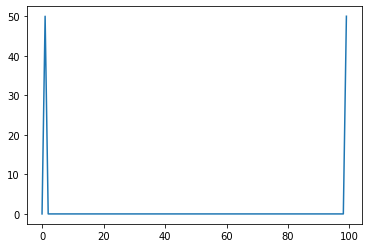

In [8]:
test_DFT = discrete_ft(simple_sine)
plt.plot(abs(test_DFT))

The only non-zero coefficients are for n=1 and n=-1 as we would expect (the k-axis has spacing $2\pi/L$).

### Question 3

In [9]:
nx2 = 1000
dx2 = xmax/nx2
x1d2 = np.arange(0,xmax,dx2)
simple_sine2 = np.sin(k*x1d2)
test_DFT = discrete_ft(simple_sine2)

In [10]:
ss_FFT = np.fft.fft(simple_sine)

The FFT is fast enough that it's hard to tell the difference between 100 and 1,000 points.  The DFT, by contrast, takes several seconds for 1,000 points (and going beyond this can tie up your notebook for some time!).

### Question 4

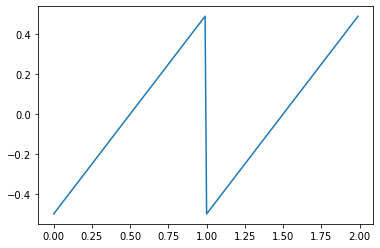

In [11]:
xsaw = np.arange(0,2,0.01)
ysaw = xsaw - 0.5
ysaw[100:] -= 1.0
plt.plot(xsaw,ysaw)

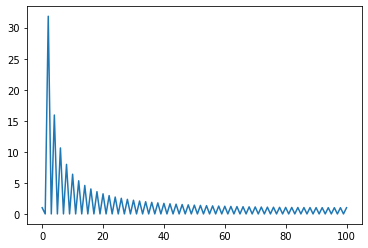

In [12]:
Fsaw = np.fft.rfft(ysaw)
plt.plot(np.abs(Fsaw))

### Question 5

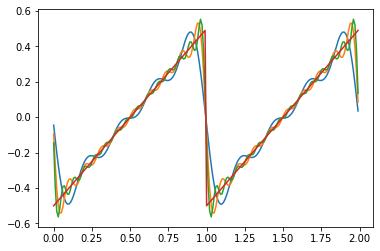

In [13]:
tmp = np.zeros_like(Fsaw)
tmp[0:10] = Fsaw[0:10]
ytrunc1 = np.fft.irfft(tmp)
tmp[0:20] = Fsaw[0:20]
ytrunc2 = np.fft.irfft(tmp)
tmp[0:30] = Fsaw[0:30]
ytrunc3 = np.fft.irfft(tmp)
plt.plot(xsaw,ytrunc1)
plt.plot(xsaw,ytrunc2)
plt.plot(xsaw,ytrunc3)
plt.plot(xsaw,ysaw)

### Question 6

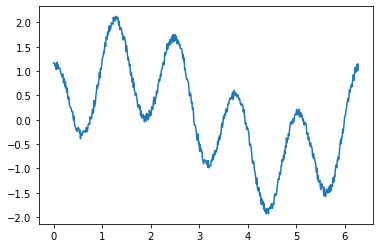

In [14]:
xnoi = np.arange(0,2*np.pi,0.01)
ynoi = np.sin(xnoi) + np.cos(5*xnoi) + 0.2*np.random.random(len(xnoi))
plt.plot(xnoi,ynoi)

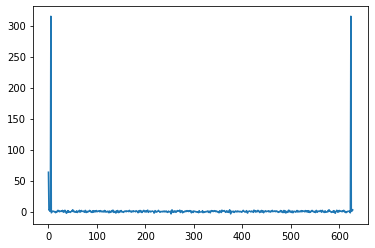

In [15]:
FFTnoi = np.fft.fft(ynoi)
plt.plot(FFTnoi.real)
#plt.xlim(0,100)
#plt.ylim(0,5)

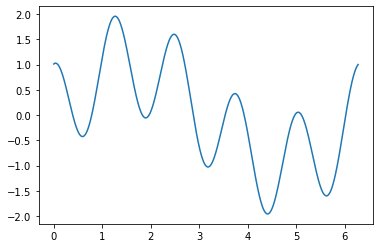

In [16]:
filtFFTnoi = np.where(abs(FFTnoi)>100,FFTnoi,0.+0j)
ynoiFilt = np.fft.ifft(filtFFTnoi)
plt.plot(xnoi,ynoiFilt.real)

## 5. Fourier transforms: more detail

### Question 1

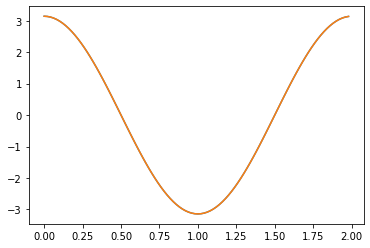

In [17]:
karr = np.zeros(nx)
dk = 2*np.pi/xmax
nkmax = int(nx/2-1)
karr[0:nkmax] = dk*np.arange(0,nx/2-1)
karr[nkmax+1:] = dk*np.arange(-nx/2,0)
d1_ss_FFT = 1j*karr*ss_FFT
diff_simple_sine = np.fft.ifft(d1_ss_FFT)
plt.plot(x1d,k*np.cos(k*x1d))
plt.plot(x1d,diff_simple_sine.real)

### Question 2

In [18]:
N = 100
xymin = 0
xymax = 40
delta = (xymax-xymin)/(N-1)
print(N," points with spacing ",delta)
x2 = np.linspace(xymin,xymax,N)
y2 = np.linspace(xymin,xymax,N)
a2,b2 = np.meshgrid(x2,y2,indexing='ij')
dk2d = 2*np.pi/(xymax - xymin)
dens_grid = np.sin(dk2d*a2)*np.sin(dk2d*b2)
print("Total charge: ",delta*delta*np.sum(dens_grid[0:50,0:50]))

100  points with spacing  0.40404040404040403
Total charge:  162.08668640471558


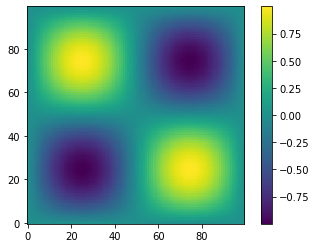

In [19]:
plt.imshow(-dens_grid,origin='lower')
plt.colorbar()

### Question 3

In [20]:
dg_FFT = np.fft.fftn(dens_grid)
nk2dmax = int(N/2-1)
k2darr = np.zeros(N)
k2darr[0:nk2dmax+1] = dk2d*np.arange(0,N/2)
k2darr[nk2dmax+1:] = dk2d*np.arange(-N/2,0)
k2d_x, k2d_y = np.meshgrid(k2darr,k2darr)
d2_dg_FFT = dg_FFT/(k2d_x*k2d_x + k2d_y*k2d_y+1e-16)
d2_dg_FFT[0,0] = 0.0
pot = np.fft.ifftn(d2_dg_FFT)

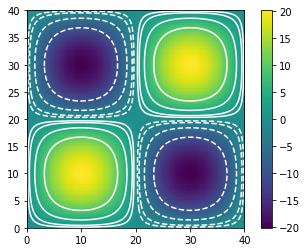

In [21]:
plt.imshow(pot.real,extent=(xymin,xymax,xymin,xymax),origin='lower')
plt.colorbar()
contours = [-10,-5,-2,-1,1.0,2.0,5.0,10]
plt.contour(a2,b2,pot.real,contours,colors='w')

### Question 4

This is what we find for the exact potential using a non-repeated grid.  Notice how the edges are rather different, and the overall shape is not the same

In [22]:
pot_exact2 = np.zeros((N,N))
for i, x in enumerate(x2):
    for j, y in enumerate(y2):
        xw = a2 - x
        yw = b2 - y
        denom = np.sqrt(xw**2 + yw**2)
        denom[i,j] = 1.0
        pothere = dens_grid/denom
        pothere[i,j] = 0.0
        pot_exact2[i,j] = np.sum(pothere)*delta*delta

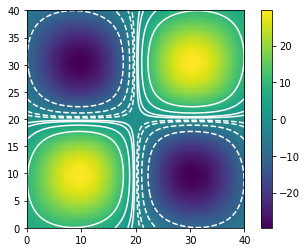

In [23]:
plt.imshow(pot_exact2,extent=(xymin,xymax,xymin,xymax),origin='lower')
plt.colorbar()
contours = [-10,-5,-2,-1,1.0,2.0,5.0,10]
plt.contour(a2,b2,pot_exact2,contours,colors='w')

### Question 5
Now we use a larger charge density to solve exactly but only consider the central part of the potential

In [24]:
N4 = 200
xymin4 = 0
xymax4 = 80
delta4 = (xymax4-xymin4)/(N4-1)
x4 = np.linspace(xymin4,xymax4,N4)
y4 = np.linspace(xymin4,xymax4,N4)
a4,b4 = np.meshgrid(x4,y4,indexing='ij')
pot_exact4 = np.zeros((N4,N4))
dens_grid4 = np.sin(dk2d*a4+np.pi)*np.sin(dk2d*b4+np.pi)
for i, x in enumerate(x4):
    for j, y in enumerate(y4):
        xw = a4 - x
        yw = b4 - y
        denom = np.sqrt(xw**2 + yw**2)
        denom[i,j] = 1.0
        pothere = dens_grid4/denom
        pothere[i,j] = 0.0
        pot_exact4[i,j] = np.sum(pothere)*delta4*delta4

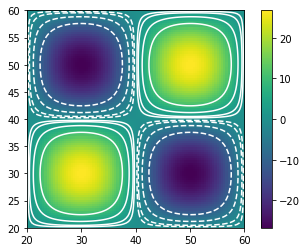

In [25]:
plt.imshow(pot_exact4[50:150,50:150],extent=(20,60,20,60),origin='lower')
plt.colorbar()
plt.contour(a4[50:150,50:150],b4[50:150,50:150],pot_exact4[50:150,50:150],contours,colors='w')

### Question 6
We use FFT methods on a large array with zero padding to mimic the exact solution for question 4

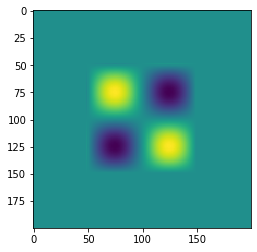

In [26]:
dens_grid5 = np.copy(dens_grid4)
dens_grid5[0:49,:] = 0.0
dens_grid5[150:] = 0.0
dens_grid5[:,0:49] = 0.0
dens_grid5[:,150:] = 0.0
plt.imshow(dens_grid5)

In [27]:
dg_FFT5 = np.fft.fftn(dens_grid5)
dk2d5 = 2*np.pi/(xymax4 - xymin4)
nk2dmax5 = int(N4/2-1)
k2darr5 = np.zeros(N4)
k2darr5[0:nk2dmax5+1] = dk2d5*np.arange(0,N4/2)
k2darr5[nk2dmax5+1:] = dk2d5*np.arange(-N4/2,0)
k2d_x5, k2d_y5 = np.meshgrid(k2darr5,k2darr5)
d2_dg_FFT5 = dg_FFT5/(k2d_x5*k2d_x5 + k2d_y5*k2d_y5+1e-16)
d2_dg_FFT5[0,0] = 0.0
pot5 = np.fft.ifftn(d2_dg_FFT5)

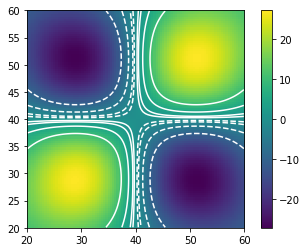

In [28]:
plt.imshow(pot5.real[50:150,50:150],extent=(20,60,20,60),origin='lower')
plt.colorbar()
plt.contour(a4[50:150,50:150],b4[50:150,50:150],pot5.real[50:150,50:150],contours,colors='w')

This is somewhat similar to Q4 but not completely; going to a larger density should converge to the same result.  I plotted the overall potential below, for reference.

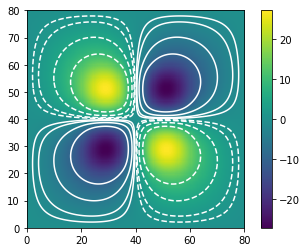

In [29]:
plt.imshow(pot5.real,extent=(0,80,0,80))
plt.colorbar()
plt.contour(a4,b4,pot5.real,contours,colors='w')